In [1]:
pip install geoplot

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import difflib
import math
import geopandas
import matplotlib.pyplot as plt
import sklearn
from pandas.io.json import  json_normalize
from shapely.geometry import Polygon, LineString, Point
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import geoplot
import geoplot.crs as gcrs


In [3]:
residential = geopandas.read_file('Hong_Kong_Outline_Zoning_Plans_Land_Use_Zonings_Residential_partial.geojson')

In [4]:
hk_districts = geopandas.read_file('Hong_Kong_18_Districts.geojson')

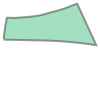

In [5]:
residential.iloc[0].geometry

In [6]:
residential

,OBJECTID,PLAN_NO,ZONE_LABEL,DESC_ENG,DESC_CHT,SPUSE_ENG,SPUSE_CHT,SHAPE_Leng,Shape__Area,Shape__Area_2,Shape__Length_2,geometry
0,2,S/FLN/2,R(B),Residential (Group B),住宅(乙類),,,652.483908,22353.150391,22353.150391,707.112618,"POLYGON ((114.14017 22.50598, 114.14068 22.504..."
1,3,S/FLN/2,R(B),Residential (Group B),住宅(乙類),,,727.920068,26126.878906,26126.878906,789.461918,"POLYGON ((114.14262 22.50592, 114.14259 22.505..."
2,4,S/FLN/2,R(A)4,Residential (Group A) 4,住宅(甲類)4,,,464.415200,14472.527344,14472.527344,504.139349,"POLYGON ((114.14375 22.50550, 114.14374 22.505..."
3,10,S/FLN/2,G/IC,"Government, Institution or Community",政府、機構或社區,,,349.995598,7893.632812,7893.632812,379.886277,"POLYGON ((114.14606 22.50236, 114.14616 22.502..."
4,11,S/FLN/2,G/IC,"Government, Institution or Community",政府、機構或社區,,,448.069882,7105.363281,7105.363281,486.161351,"POLYGON ((114.14659 22.50375, 114.14659 22.503..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5725,11606,S/YL/23,R(A),Residential (Group A),住宅(甲類),,,403.812034,6530.968750,6530.968750,437.569797,"POLYGON ((114.02648 22.44373, 114.02653 22.443..."
5726,11608,S/YL/23,R(A)1,Residential (Group A) 1,住宅(甲類)1,,,500.712486,18140.425781,18140.425781,542.917181,"POLYGON ((114.02170 22.43641, 114.02137 22.436..."
5727,11609,S/YL/23,R(B)1,Residential (Group B) 1,住宅(乙類)1,,,354.270735,8259.232422,8259.232422,384.109993,"POLYGON ((114.03194 22.44977, 114.03185 22.449..."
5728,11610,S/YL/23,V,Village Type Development,鄉村式發展,,,630.113700,22453.941406,22453.941406,683.184511,"POLYGON ((114.02618 22.43886, 114.02623 22.438..."


In [7]:
hk_districts

,OBJECTID,ID,CNAME,CNAME_S,ENAME,SHAPE_Length,SHAPE_Area,geometry
0,1,1.0,黃大仙區,黄大仙区,WONG TAI SIN,0.156228,0.000816,"MULTIPOLYGON (((114.17942 22.34905, 114.17946 ..."
1,2,6.0,九龍城區,九龙城区,KOWLOON CITY,0.273668,0.000884,"MULTIPOLYGON (((114.17700 22.34904, 114.17702 ..."
2,3,7.0,觀塘區,观塘区,KWUN TONG,0.220475,0.000987,"MULTIPOLYGON (((114.24371 22.28620, 114.24370 ..."
3,4,8.0,西貢區,西贡区,SAI KUNG,3.154700,0.011963,"MULTIPOLYGON (((114.22112 22.35318, 114.22114 ..."
4,5,11.0,北區,北区,NORTH,1.671697,0.012070,"MULTIPOLYGON (((114.33576 22.51003, 114.33576 ..."
5,6,13.0,中西區,中西区,CENTRAL & WESTERN,0.231894,0.001091,"MULTIPOLYGON (((114.14562 22.29045, 114.14990 ..."
6,7,14.0,灣仔區,湾仔区,WAN CHAI,0.168909,0.000867,"MULTIPOLYGON (((114.20012 22.27387, 114.20047 ..."
7,8,15.0,東區,东区,EASTERN,0.313439,0.001631,"MULTIPOLYGON (((114.24738 22.25339, 114.24733 ..."
8,9,17.0,屯門區,屯门区,TUEN MUN,0.859430,0.007402,"MULTIPOLYGON (((113.93745 22.42638, 113.93765 ..."
9,10,18.0,元朗區,元朗区,YUEN LONG,0.790774,0.012297,"MULTIPOLYGON (((113.93832 22.42696, 113.93843 ..."


In [8]:
residential.iloc[456].geometry.within(hk_districts.iloc[4].geometry)

False

In [9]:
OBJID_1 =  residential[residential.geometry.within(hk_districts.iloc[0].geometry)]

In [10]:
OBJID_2 =  residential[residential.geometry.within(hk_districts.iloc[1].geometry)]

In [11]:
OBJID_3 =  residential[residential.geometry.within(hk_districts.iloc[2].geometry)]

In [12]:
OBJID_4 =  residential[residential.geometry.within(hk_districts.iloc[3].geometry)]

In [13]:
OBJID_5 =  residential[residential.geometry.within(hk_districts.iloc[4].geometry)]

In [14]:
OBJID_6 =  residential[residential.geometry.within(hk_districts.iloc[5].geometry)]

In [15]:
OBJID_7 =  residential[residential.geometry.within(hk_districts.iloc[6].geometry)]

In [16]:
OBJID_8 =  residential[residential.geometry.within(hk_districts.iloc[7].geometry)]

In [17]:
OBJID_9 =  residential[residential.geometry.within(hk_districts.iloc[8].geometry)]

In [18]:
OBJID_10 =  residential[residential.geometry.within(hk_districts.iloc[9].geometry)]

In [19]:
OBJID_11 =  residential[residential.geometry.within(hk_districts.iloc[10].geometry)]

In [20]:
OBJID_12 =  residential[residential.geometry.within(hk_districts.iloc[11].geometry)]

In [21]:
OBJID_13 =  residential[residential.geometry.within(hk_districts.iloc[12].geometry)]

In [22]:
OBJID_14 =  residential[residential.geometry.within(hk_districts.iloc[13].geometry)]

In [23]:
OBJID_15 =  residential[residential.geometry.within(hk_districts.iloc[14].geometry)]

In [24]:
OBJID_16 =  residential[residential.geometry.within(hk_districts.iloc[15].geometry)]

In [25]:
OBJID_17 =  residential[residential.geometry.within(hk_districts.iloc[16].geometry)]

In [26]:
OBJID_18 =  residential[residential.geometry.within(hk_districts.iloc[17].geometry)]

In [27]:
len(OBJID_1) + len(OBJID_2) + len(OBJID_3) + len(OBJID_4) + len(OBJID_5) + len(OBJID_6) + len(OBJID_7) + len(OBJID_8) + len(OBJID_9) + len(OBJID_10) + len(OBJID_11) + len(OBJID_12) + len(OBJID_13) + len(OBJID_14) +len(OBJID_15) +len(OBJID_16) + len(OBJID_17) + len(OBJID_18) 

5477

In [28]:
OBJID_1

,OBJECTID,PLAN_NO,ZONE_LABEL,DESC_ENG,DESC_CHT,SPUSE_ENG,SPUSE_CHT,SHAPE_Leng,Shape__Area,Shape__Area_2,Shape__Length_2,geometry
2117,4331,S/K11/29,G/IC,"Government, Institution or Community",政府、機構或社區,,,192.818354,2442.138672,2442.138672,208.896152,"POLYGON ((114.19968 22.34615, 114.19967 22.346..."
2118,4332,S/K11/29,G/IC,"Government, Institution or Community",政府、機構或社區,,,61.170765,255.740234,255.740234,66.252822,"POLYGON ((114.19620 22.34084, 114.19621 22.340..."
2119,4333,S/K11/29,R(A),Residential (Group A),住宅(甲類),,,1259.441357,112410.701172,112410.701172,1364.645360,"POLYGON ((114.19888 22.34347, 114.19896 22.343..."
2120,4334,S/K11/29,R(A)3,Residential (Group A) 3,住宅(甲類)3,,,342.567757,6129.482422,6129.482422,370.657446,"POLYGON ((114.20146 22.34718, 114.20155 22.347..."
2121,4335,S/K11/29,R(A),Residential (Group A),住宅(甲類),,,698.601750,33169.476562,33169.476562,757.728920,"POLYGON ((114.20791 22.34242, 114.20803 22.342..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3356,6640,S/K8/22,G/IC,"Government, Institution or Community",政府、機構或社區,,,294.373746,4762.402344,4762.402344,318.840209,"POLYGON ((114.19476 22.33694, 114.19454 22.336..."
3357,6641,S/K8/22,G/IC,"Government, Institution or Community",政府、機構或社區,,,397.870316,4788.494141,4788.494141,431.899497,"POLYGON ((114.19440 22.33345, 114.19440 22.333..."
3358,6642,S/K8/22,G/IC,"Government, Institution or Community",政府、機構或社區,,,457.857007,13721.376953,13721.376953,496.458594,"POLYGON ((114.19547 22.33202, 114.19543 22.332..."
3359,6644,S/K8/22,G/IC,"Government, Institution or Community",政府、機構或社區,,,207.882006,3088.277344,3088.277344,225.175706,"POLYGON ((114.19301 22.33470, 114.19300 22.334..."


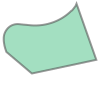

In [29]:
OBJID_1.geometry.iloc[0]

<AxesSubplot:>

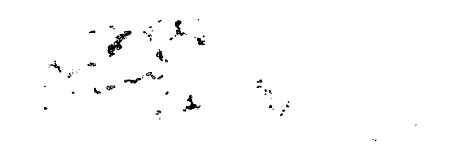

In [30]:
geoplot.polyplot(OBJID_12)

In [59]:
# Give district's OBJECTID from the Hong_Kong_18_Districts.geojson and the filted residential dataframe.
# Returns the residential areas with in the district.
def get_residentials_by_district(district_OBJECTID, hk_district_dataframe, residential_dataframe):
    res = residential_dataframe[residential_dataframe.geometry.within(hk_district_dataframe.iloc[district_OBJECTID-1].geometry)]
    return res.geometry


<AxesSubplot:>

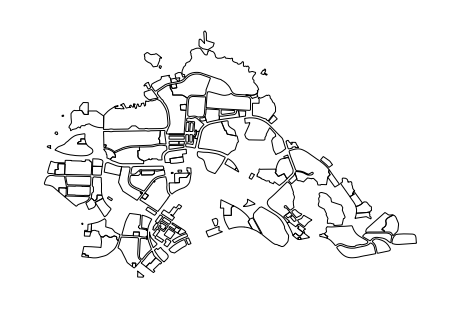

In [60]:
# For example, OBJECTID == 1 (Won Tai Sin),
# the resulting plot is the residential areas in district Won Tai Sin.
test = get_residentials_by_district(1,hk_districts, residential)
geoplot.polyplot(test)

In [33]:
# Give district's OBJECTID from the Hong_Kong_18_Districts.geojson and the filted residential dataframe.
# Returns the ARRAY of residential area polygons with in the district.
def get_residentials_by_district_polygon(district_OBJECTID, residential_dataframe):
    res = residential_dataframe[residential_dataframe.geometry.within(hk_districts.iloc[district_OBJECTID-1].geometry)]
    return res.geometry

In [34]:
# Example..
test_1 = get_residentials_by_district_polygon(1, residential)
test_1

2117    POLYGON ((114.19968 22.34615, 114.19967 22.346...
2118    POLYGON ((114.19620 22.34084, 114.19621 22.340...
2119    POLYGON ((114.19888 22.34347, 114.19896 22.343...
2120    POLYGON ((114.20146 22.34718, 114.20155 22.347...
2121    POLYGON ((114.20791 22.34242, 114.20803 22.342...
                              ...                        
3356    POLYGON ((114.19476 22.33694, 114.19454 22.336...
3357    POLYGON ((114.19440 22.33345, 114.19440 22.333...
3358    POLYGON ((114.19547 22.33202, 114.19543 22.332...
3359    POLYGON ((114.19301 22.33470, 114.19300 22.334...
3360    POLYGON ((114.18999 22.33451, 114.19002 22.334...
Name: geometry, Length: 153, dtype: geometry

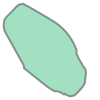

In [35]:
test_1.iloc[100]

In [36]:
def get_random_points_in_residential_areas(district_OBJECTID, residential_dataframe, num_point):
    
    residential_areas = residential_dataframe[residential_dataframe.geometry.within(hk_districts.iloc[district_OBJECTID-1].geometry)]
    
    min_x, min_y, max_x, max_y = residential_areas.bounds
    
    x = np.random.uniform(min_x, max_x, num_point)
    y = np.random.uniform(min_y, max_y, num_point)
    
    points = geopandas.GeoSeries(geopandas.points_from_xy(x, y))
    
    points = points[points.within(residential_areas)]
    
    return points

In [37]:
len(OBJID_1)

153

In [38]:
def generate_random_location_within_ROI(num_pt, polygon):
    
    bounds_all = polygon.bounds
    minx = min(bounds_all.minx)
    maxx = max(bounds_all.maxx)
    miny = min(bounds_all.miny)
    maxy = max(bounds_all.maxy)
    
    i = 0 
    x = []
    y = []
    while i < num_pt:
        x_t = np.random.uniform(minx, maxx)
        y_t = np.random.uniform(miny, maxy)
        
        for p in polygon:
            if Point(x_t, y_t).within(p):
                x.append(x_t)
                y.append(y_t)
                i = i + 1
                break
                
    return x, y

In [43]:
test1 = generate_random_location_within_ROI(184, test_1)

In [54]:
test1[0][0]

114.2069029339476

In [230]:
hk_population = pd.read_csv("population.csv")

In [231]:
hk_population

,Unnamed: 0,Central and Western,Wan Chai (1),Eastern (1),Southern,Yau Tsim Mong,Sham Shui Po,Kowloon City,Wong Tai Sin,Kwun Tong,Kwai Tsing,Tsuen Wan,Tuen Mun,Yuen Long,North,Tai Po,Sha Tin,Sai Kung,Islands,Land
0,0,1 402,979,2 336,1 151,2 077,2 300,2 170,1 376,2 537,1 986,1 944,2 491,3 912,1 595,1 765,3 134,2 926,1 229,37 310
1,1,1 646,956,2 517,1 382,2 570,2 562,2 432,1 704,3 183,2 616,2 276,3 272,4 847,1 727,2 031,3 918,3 624,1 346,44 609
2,2,1 403,1 040,2 896,1 421,2 385,2 791,2 684,1 792,3 450,2 858,2 339,3 205,5 185,1 936,1 991,4 089,3 460,1 350,46 275
3,3,1 549,1 020,2 988,1 604,2 270,3 037,2 825,2 081,3 739,2 886,2 411,3 367,4 995,2 067,2 187,4 392,3 316,1 661,48 395
4,4,1 583,1 115,3 243,1 662,2 554,3 158,3 293,2 264,4 255,3 056,2 643,3 634,5 276,2 123,2 450,4 855,3 810,1 391,52 365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,997,1 026,2 949,1 373,1 331,2 109,2 211,2 457,3 918,2 651,1 384,1 849,2 009,1 102,1 096,2 901,1 607,596,33 566
83,83,1 059,949,3 069,1 467,1 457,2 203,2 137,2 527,3 914,2 777,1 470,1 798,2 002,1 193,1 144,2 921,1 548,543,34 178
84,84,1 029,894,2 893,1 388,1 329,2 166,2 077,2 416,3 666,2 572,1 296,1 431,1 758,1 085,1 073,2 683,1 525,456,31 737
85,85+,8 555,7 002,21 930,10 718,9 221,15 879,15 333,18 411,24 821,16 053,8 923,10 049,12 689,7 802,7 806,18 124,9 421,3 473,226 210


In [232]:
hk_population = hk_population[hk_population['Unnamed: 0'] == '85+']

In [233]:
hk_population = hk_population.drop('Unnamed: 0', axis = 1)

In [234]:
hk_population

,Central and Western,Wan Chai (1),Eastern (1),Southern,Yau Tsim Mong,Sham Shui Po,Kowloon City,Wong Tai Sin,Kwun Tong,Kwai Tsing,Tsuen Wan,Tuen Mun,Yuen Long,North,Tai Po,Sha Tin,Sai Kung,Islands,Land
85,8 555,7 002,21 930,10 718,9 221,15 879,15 333,18 411,24 821,16 053,8 923,10 049,12 689,7 802,7 806,18 124,9 421,3 473,226 210


In [235]:
hk_population.columns = ['CENTRAL & WESTERN', 'WAN CHAI', 'EASTERN', "SOUTHERN", 'YAU TSIM MONG', 'SHAM SHUI PO', 'KOWLOON CITY', 'WONG TAI SIN', 'KWUN TONG', 'KWAI TSING', "TSUEN WAN", "TUEN MUN", "YUEN LONG", "NORTH", "TAI PO", "SHA TIN", 'SAI KUNG', 'ISLANDS', 'LAND']

In [237]:
hk_population = hk_population.drop('LAND', axis = 1)

In [274]:
hk_population_new = hk_population.T

In [275]:
hk_population_new.columns = ['population']

In [281]:
hk_population_new.population = hk_population_new.population.values

In [286]:
hk_population_new

,population
CENTRAL & WESTERN,8 555
WAN CHAI,7 002
EASTERN,21 930
SOUTHERN,10 718
YAU TSIM MONG,9 221
SHAM SHUI PO,15 879
KOWLOON CITY,15 333
WONG TAI SIN,18 411
KWUN TONG,24 821
KWAI TSING,16 053


In [288]:
hk_overall = hk_districts.join(hk_population_new, on='ENAME')

In [289]:
hk_overall

,OBJECTID,ID,CNAME,CNAME_S,ENAME,SHAPE_Length,SHAPE_Area,geometry,population
0,1,1.0,黃大仙區,黄大仙区,WONG TAI SIN,0.156228,0.000816,"MULTIPOLYGON (((114.17942 22.34905, 114.17946 ...",18 411
1,2,6.0,九龍城區,九龙城区,KOWLOON CITY,0.273668,0.000884,"MULTIPOLYGON (((114.17700 22.34904, 114.17702 ...",15 333
2,3,7.0,觀塘區,观塘区,KWUN TONG,0.220475,0.000987,"MULTIPOLYGON (((114.24371 22.28620, 114.24370 ...",24 821
3,4,8.0,西貢區,西贡区,SAI KUNG,3.154700,0.011963,"MULTIPOLYGON (((114.22112 22.35318, 114.22114 ...",9 421
4,5,11.0,北區,北区,NORTH,1.671697,0.012070,"MULTIPOLYGON (((114.33576 22.51003, 114.33576 ...",7 802
5,6,13.0,中西區,中西区,CENTRAL & WESTERN,0.231894,0.001091,"MULTIPOLYGON (((114.14562 22.29045, 114.14990 ...",8 555
6,7,14.0,灣仔區,湾仔区,WAN CHAI,0.168909,0.000867,"MULTIPOLYGON (((114.20012 22.27387, 114.20047 ...",7 002
7,8,15.0,東區,东区,EASTERN,0.313439,0.001631,"MULTIPOLYGON (((114.24738 22.25339, 114.24733 ...",21 930
8,9,17.0,屯門區,屯门区,TUEN MUN,0.859430,0.007402,"MULTIPOLYGON (((113.93745 22.42638, 113.93765 ...",10 049
9,10,18.0,元朗區,元朗区,YUEN LONG,0.790774,0.012297,"MULTIPOLYGON (((113.93832 22.42696, 113.93843 ...",12 689


In [74]:
o1 = get_residentials_by_district(1, hk_districts, residential)

In [75]:
o1_points = generate_random_location_within_ROI(184, o1)

In [88]:
o2 = get_residentials_by_district(2, hk_districts, residential)
o2_points = generate_random_location_within_ROI(153, o2)

In [109]:
len(o2_points[0]) + len(o1_points[1])

337

In [338]:
test_tuple = [],[]

In [339]:
test_tuple[0].append(o2_points[0])
test_tuple[1].append(o2_points[1])

In [340]:
test_tuple[1]

[[22.312371382447076,
  22.322588186903932,
  22.324702865619724,
  22.312522239372488,
  22.32404407851084,
  22.313557196831756,
  22.342498292910225,
  22.326538417815804,
  22.332953675491922,
  22.341959256483918,
  22.312583755748793,
  22.322115244167524,
  22.33707392491837,
  22.313970624688864,
  22.324859621397724,
  22.313094515211088,
  22.317698215869076,
  22.328300757402506,
  22.320054868582314,
  22.33180675848961,
  22.334356673171953,
  22.31650612679842,
  22.313660595217918,
  22.32551027578061,
  22.33502227929765,
  22.323243542924292,
  22.33817366165682,
  22.316473217314257,
  22.313253137484683,
  22.328393339562368,
  22.31548216308289,
  22.322170383775475,
  22.325694024979853,
  22.3334320016466,
  22.327245932337735,
  22.315182876529505,
  22.321222486214154,
  22.31790551122904,
  22.317171087501123,
  22.333360058315353,
  22.308131924682975,
  22.3227150124813,
  22.326906827146995,
  22.330496389043386,
  22.314838374218645,
  22.31115140831706,
  

In [290]:
target_population = hk_overall

In [378]:
res_points = [],[]

for i in range(0, 17) :
    district = get_residentials_by_district(i+2, hk_districts, residential)
    
    num_points = round(int(target_population.population[i].replace(" ",""))/100)
    
    district_points = generate_random_location_within_ROI(num_points, district)
    
    res_points[0].append(district_points[0])
    res_points[1].append(district_points[1])
    
    
    

In [344]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [379]:
len(res_points[0])

17

In [380]:
res_lon = flatten(res_points[0])
res_lat = flatten(res_points[1])

In [382]:
len(res_lon)

2080

In [383]:
len(res_lat)

2080

In [384]:
final = (res_lon, res_lat)

In [385]:
len(final)

2

In [386]:
final

([114.17663785664149,
  114.18549879824543,
  114.1816627477598,
  114.18073013653283,
  114.17578190417673,
  114.18321859928513,
  114.20119847491077,
  114.17945759008848,
  114.1860973850351,
  114.1759826495602,
  114.1842286757982,
  114.19997327784304,
  114.17885452600999,
  114.18412079364923,
  114.17654878300478,
  114.20338070649785,
  114.17814502253488,
  114.20682572371358,
  114.18143723403594,
  114.17376209169822,
  114.2022085609596,
  114.18482375515048,
  114.19109602688054,
  114.17860547499492,
  114.19241415990805,
  114.17303014903749,
  114.17539683335669,
  114.17519110148747,
  114.17637816162612,
  114.18354196003335,
  114.17857726519583,
  114.17558142085126,
  114.18075516642855,
  114.18208370267746,
  114.17378914925473,
  114.18057749873495,
  114.18569211324088,
  114.18638727766431,
  114.1817265771906,
  114.19107295707003,
  114.17453192528127,
  114.20745608144966,
  114.18336134450901,
  114.17605379134915,
  114.20513632119847,
  114.1912319869

In [387]:
final_df = pd.DataFrame({'lon': res_lon, 'lat': res_lat} )

In [388]:
final_df

,lon,lat
0,114.176638,22.321316
1,114.185499,22.323993
2,114.181663,22.323781
3,114.180730,22.324615
4,114.175782,22.317821
...,...,...
2075,114.213433,22.381870
2076,114.175429,22.371495
2077,114.205316,22.415742
2078,114.227583,22.401433


In [389]:
temp_df = final_df

In [390]:
(temp_df['lon'].values,temp_df['lat'].values)

(array([114.17663786, 114.1854988 , 114.18166275, ..., 114.20531585,
        114.22758295, 114.19945735]),
 array([22.32131572, 22.32399341, 22.32378133, ..., 22.4157421 ,
        22.40143345, 22.38094575]))

In [391]:
final_df.to_csv('random_points_all_districts.csv')